## 1. Dokumentasi coding Load Dataset

Pada tahap ini kita mengimpor beberapa library Python yang digunakan untuk proses Exploratory Data Analysis (EDA), yaitu:
- pandas : untuk membaca dan mengolah data dalam bentuk tabel (dataframe).
- numpy : untuk perhitungan numerik.
- seaborn dan matplotlib : untuk membuat visualisasi data (grafik/plot).


In [ ]:
# 1. Load dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Dokumentasi Coding Memberi Nama Kolom

Dataset `adult.data` dari UCI tidak memiliki header (nama kolom) secara default.
Oleh karena itu, kita perlu menambahkan nama kolom agar lebih mudah dibaca dan dipahami.

Berikut adalah daftar kolom yang digunakan:
1. age → umur responden
2. workclass → jenis pekerjaan
3. fnlwgt → final weight (bobot sampel sensus)
4. education → tingkat pendidikan
5. education_num → tingkat pendidikan dalam bentuk angka
6. marital_status → status pernikahan
7. occupation → jenis pekerjaan spesifik
8. relationship → hubungan keluarga
9. race → ras
10. sex → jenis kelamin
11. capital_gain → keuntungan modal
12. capital_loss → kerugian modal
13. hours_per_week → jumlah jam kerja per minggu
14. native_country → negara asal
15. income → target (<=50K atau >50K per tahun)


In [ ]:
# 2. Memberi nama kolom
col_names = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

Dokumntasi Coding Load Dataset adult.data

Dataset adult.data dari UCI disimpan dalam format mirip CSV, namun tidak memiliki header (nama kolom).
Karena pada tahap sebelumnya kita sudah mendefinisikan daftar nama kolom (col_names), maka pada tahap ini kita membaca file dan langsung menambahkan nama kolom tersebut.

In [ ]:
# load file adult.data
df = pd.read_csv("adult.data", names=col_names, sep=",", skipinitialspace=True)

3. Dokumentasi Coding Informasi Dataset

Setelah dataset berhasil dimuat, langkah berikutnya adalah melihat informasi umum dan ringkasan dari data yang ada.
Langkah ini bertujuan untuk memahami struktur dataset, jumlah baris dan kolom, tipe data, serta gambaran awal kondisi data.

Kode yang digunakan:

In [ ]:
# 3. Info dataset
print("Informasi Dataset:")
print(df.info())
print("\n5 Record Pertama:")
print(df.head())
print("\nRingkasan Statistik:")
print(df.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

5 Record Pertama:
   age         workclass  fnlwgt  education  educa

Penjelasan:

df.info() → Menampilkan jumlah baris dan kolom, tipe data setiap kolom, serta jumlah nilai non-null (tidak kosong).

Berguna untuk mendeteksi adanya missing value dan memastikan tipe data sesuai.

df.head() → Menampilkan 5 baris pertama dari dataset.

Membantu memverifikasi apakah data sudah terbaca dengan benar dan nama kolom sesuai.

df.describe() → Menampilkan ringkasan statistik dasar untuk kolom numerik (seperti mean, min, max, std, quartile).

Membantu memahami distribusi awal data numerik.

Hasil yang diperoleh:

Dataset memiliki sekitar 32.561 baris dengan 15 kolom.

Kolom terdiri dari data numerik (seperti age, hours_per_week) dan kategorikal (seperti workclass, sex).

Contoh 5 record pertama menunjukkan data sensus individu.

Ringkasan statistik memberikan gambaran distribusi awal nilai numerik (rata-rata, median, min, max, dll).

4. Dokumentasi Coding Cek Missing Value

Langkah selanjutnya adalah memeriksa apakah dataset memiliki nilai yang hilang (missing value).
Pemeriksaan ini penting karena data yang hilang dapat memengaruhi analisis dan model machine learning.

Kode yang digunakan:

In [ ]:
# 4. Cek missing value
print("\nCek Missing Value:")
print(df.isnull().sum())

# Cek missing yang ditandai "?"
print("\nCek Missing dengan tanda '?' :")
print((df == "?").sum())


Cek Missing Value:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Cek Missing dengan tanda '?' :
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


Penjelasan:

df.isnull().sum() → Mengecek jumlah missing value (NaN) pada setiap kolom.

Jika ada nilai kosong bawaan Python/pandas, hasilnya akan terlihat di sini.

(df == "?").sum() → Pada dataset Adult Census Income, nilai kosong tidak selalu ditandai dengan NaN.

Sering kali nilai hilang ditandai dengan simbol "?".

Perintah ini digunakan untuk menghitung jumlah data yang memiliki tanda "?" pada tiap kolom.

Hasil yang diperoleh:

Tidak ditemukan missing value dalam bentuk NaN.

Namun, terdapat beberapa kolom (seperti workclass, occupation, dan native_country) yang memiliki data hilang ditandai dengan "?".

Hal ini berarti dataset perlu dilakukan handling missing value agar lebih bersih sebelum analisis lebih lanjut.

5. Cek Data Duplikat

Setelah memeriksa data yang hilang, langkah berikutnya adalah memastikan apakah dataset mengandung data duplikat.
Data duplikat bisa menyebabkan analisis bias karena informasi yang sama dihitung lebih dari sekali.

Kode yang digunakan:

In [ ]:
# 5. Cek data duplikat
print("\nJumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 24


Penjelasan:

df.duplicated() → Mengecek setiap baris pada DataFrame apakah ada yang persis sama dengan baris sebelumnya.

Menghasilkan nilai True jika baris tersebut merupakan duplikat.

.sum() → Menjumlahkan semua nilai True sehingga diperoleh total jumlah data yang duplikat.

Hasil yang diperoleh:

Jumlah data duplikat yang ditemukan adalah 24 baris.

Artinya, ada 24 baris data yang identik dengan baris lain di dalam dataset.

Sebaiknya baris duplikat ini dihapus agar analisis lebih akurat.

6. Cek Outliers

Outlier adalah data yang nilainya jauh berbeda dari mayoritas data lain.
Untuk mendeteksi outlier, digunakan boxplot pada kolom age dan hours_per_week.

Kode yang digunakan:

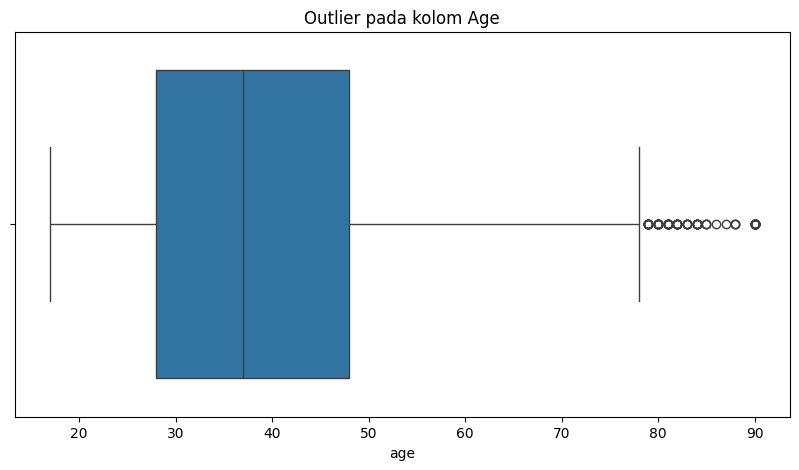

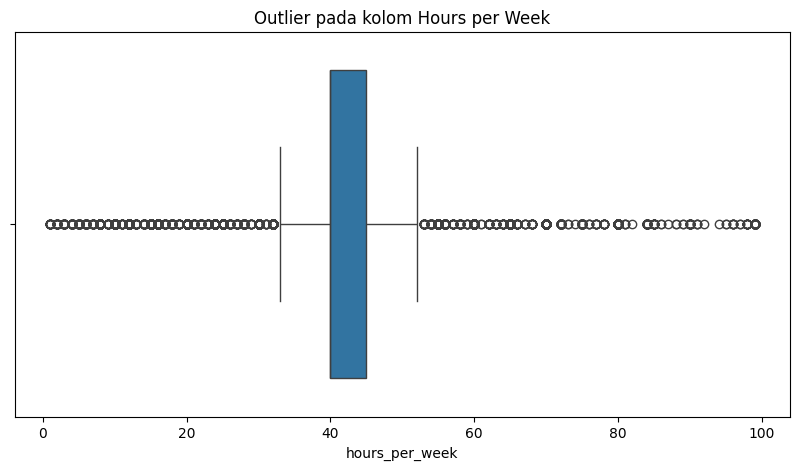

In [ ]:
# 6. Cek outliers (contoh pakai age dan hours_per_week)
plt.figure(figsize=(10,5))
sns.boxplot(x=df["age"])
plt.title("Outlier pada kolom Age")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df["hours_per_week"])
plt.title("Outlier pada kolom Hours per Week")
plt.show()

Hasil Visualisasi:

1. Kolom Age (Usia)

Mayoritas data berada pada rentang 20–70 tahun.

Terlihat beberapa titik outlier pada usia di atas 80 tahun hingga sekitar 90 tahun.

Hal ini wajar karena populasi lanjut usia jumlahnya sedikit.

2. Kolom Hours per Week (Jam Kerja per Minggu)

Mayoritas responden bekerja sekitar 40 jam/minggu.

Terdapat banyak outlier pada jam kerja sangat rendah (1–10 jam/minggu) maupun sangat tinggi (lebih dari 80 jam/minggu hingga 99 jam/minggu).

Outlier ini mencerminkan pekerja dengan kondisi khusus (pekerja paruh waktu atau kerja ekstrim).

Kesimpulan:

Dataset memiliki outlier baik pada kolom age maupun hours_per_week.

Outlier ini bisa dipertahankan jika dianggap sebagai data valid (misalnya orang lanjut usia yang masih bekerja, atau pekerja dengan jam kerja ekstrem), atau bisa dihapus jika dianggap mengganggu analisis.


Distribusi Target Income:
income
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64


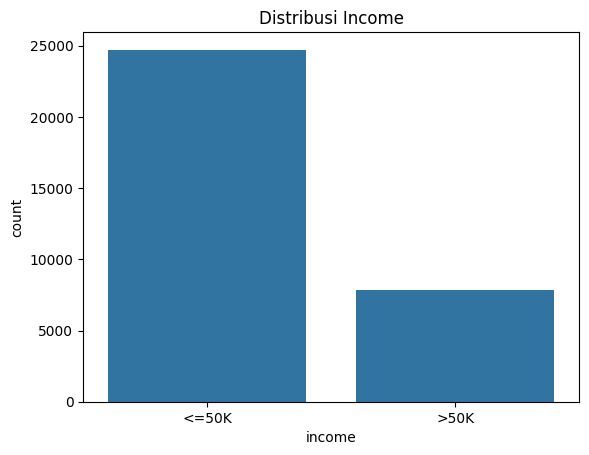

In [ ]:
# 7. Cek imbalance data (target income)
print("\nDistribusi Target Income:")
print(df["income"].value_counts(normalize=True) * 100)
sns.countplot(data=df, x="income")
plt.title("Distribusi Income")
plt.show()

Distribusi target income tidak seimbang (imbalanced). Sekitar 76% data berada pada kelas <=50K dan hanya 24% pada kelas >50K. Hal ini menunjukkan bahwa dataset cenderung bias ke kelas mayoritas sehingga perlu dilakukan teknik penanganan imbalance (misalnya oversampling SMOTE, undersampling, atau class_weight pada model).

In [ ]:
# 8. Handling missing value
# Mengubah "?" jadi NaN, lalu didrop
df_clean = df.replace("?", np.nan)
df_clean = df_clean.dropna()
print("\nDataset setelah handling missing value:", df_clean.shape)


Dataset setelah handling missing value: (30162, 15)


Penjelasan:

Langkah 1 → Mengubah semua tanda "?" menjadi NaN supaya Python bisa mengenali sebagai missing value.

Langkah 2 → Menggunakan dropna() untuk menghapus semua baris yang masih mengandung NaN.

Output → Dataset awal berisi ±32.561 baris, setelah pembersihan menyisakan 30.162 baris dengan 15 kolom. Artinya, sekitar 2.399 baris data yang mengandung missing value dihapus.

Kesimpulan No 8:

Proses handling missing value berhasil membersihkan dataset dari data yang hilang. Dataset akhir yang siap digunakan memiliki 30.162 baris × 15 kolom.

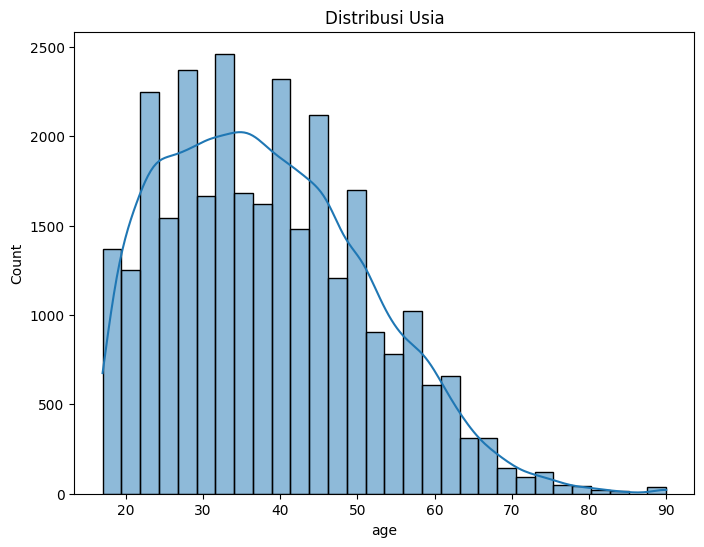

In [ ]:
# 9. Visualisasi kolom (contoh kolom: distribusi umur)
plt.figure(figsize=(8,6))
sns.histplot(data=df_clean, x="age", bins=30, kde=True)
plt.title("Distribusi Usia")
plt.show()

Hasil Visualisasi:

Histogram menunjukkan distribusi umur (age) pada dataset setelah dibersihkan.

Garis KDE (Kernel Density Estimation) menampilkan bentuk kurva sebaran usia.

Penjelasan:

Sebagian besar data berada di rentang 20–50 tahun, dengan puncak sekitar umur 30-an.

Distribusi menurun setelah umur 50, dengan jumlah individu lebih sedikit pada usia lanjut.

Rentang usia maksimal yang tercatat dalam dataset mencapai 90 tahun.

Pola distribusi terlihat right-skewed (condong ke kanan), karena ada ekor panjang pada usia lebih tua.

Kesimpulan No 9:

Distribusi usia pada dataset menunjukkan mayoritas individu berada pada usia produktif (20–50 tahun). Hal ini penting karena bisa memengaruhi analisis pendapatan (income) berdasarkan usia.

In [ ]:
# 10. Memisahkan kolom numerik dan kategorikal
num_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df_clean.select_dtypes(include=["object"]).columns

print("Kolom Numerik:", num_cols.tolist())
print("Kolom Kategorikal:", cat_cols.tolist())

Kolom Numerik: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
Kolom Kategorikal: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Penjelasan:

Kolom Numerik adalah variabel yang berisi data angka dan bisa dianalisis dengan operasi matematika/statistik. Contohnya:

age → umur

hours_per_week → jam kerja per minggu

capital_gain dan capital_loss → keuntungan/kerugian modal

education_num → level pendidikan dalam bentuk angka

fnlwgt → bobot sampling

Kolom Kategorikal berisi data berbentuk kategori/label. Contohnya:

workclass → jenis pekerjaan

marital_status → status pernikahan

education → tingkat pendidikan

sex → jenis kelamin

income → target variabel klasifikasi (<=50K atau >50K)

In [ ]:
#Hasil No 10
df_num = df_clean[num_cols]
df_cat = df_clean[cat_cols]

print("Data Numerik:")
print(df_num.head())

print("\nData Kategorikal:")
print(df_cat.head())


Data Numerik:
   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
2   38  215646              9             0             0              40
3   53  234721              7             0             0              40
4   28  338409             13             0             0              40

Data Kategorikal:
          workclass  education      marital_status         occupation  \
0         State-gov  Bachelors       Never-married       Adm-clerical   
1  Self-emp-not-inc  Bachelors  Married-civ-spouse    Exec-managerial   
2           Private    HS-grad            Divorced  Handlers-cleaners   
3           Private       11th  Married-civ-spouse  Handlers-cleaners   
4           Private  Bachelors  Married-civ-spouse     Prof-specialty   

    relationship   race     sex native_country income  
0  Not-in-family  White    M

Kesimpulan No 10:

Dataset terdiri dari 6 kolom numerik dan 9 kolom kategorikal. Pemisahan ini penting sebagai tahap awal sebelum melakukan preprocessing lebih lanjut, seperti encoding untuk data kategorikal atau scaling untuk data numerik.